# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [22]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [23]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")




Number of cities in the list: 595


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [24]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1
units = "metric"
# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units={units}" 
    

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

            # Append the City information into city_data list
        city_data.append({"City": city,
                            "Lat": city_lat,
                            "Lng": city_lng,
                            "Max Temp": city_max_temp,
                            "Humidity": city_humidity,
                            "Cloudiness": city_clouds,
                            "Wind Speed": city_wind,
                            "Country": city_country,
                            "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | albany
Processing Record 2 of Set 1 | notodden
Processing Record 3 of Set 1 | yellowknife
Processing Record 4 of Set 1 | kapuskasing
Processing Record 5 of Set 1 | kibiti
Processing Record 6 of Set 1 | ushuaia
Processing Record 7 of Set 1 | tsiombe
Processing Record 8 of Set 1 | port-aux-francais
Processing Record 9 of Set 1 | wailua homesteads
Processing Record 10 of Set 1 | badger
Processing Record 11 of Set 1 | nova vicosa
Processing Record 12 of Set 1 | grytviken
Processing Record 13 of Set 1 | puerto ayora
Processing Record 14 of Set 1 | bethel
Processing Record 15 of Set 1 | edinburgh of the seven seas
Processing Record 16 of Set 1 | ribeira grande
Processing Record 17 of Set 1 | chonchi
Processing Record 18 of Set 1 | bilibino
Processing Record 19 of Set 1 | meulaboh
Processing Record 20 of Set 1 | saint-philippe
Processing Record 21 of Set 1 | sitka
Processing Record 22 of Set 1 | tazovsk

In [25]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          572
Lat           572
Lng           572
Max Temp      572
Humidity      572
Cloudiness    572
Wind Speed    572
Country       572
Date          572
dtype: int64

In [26]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,albany,42.6001,-73.9662,18.58,78,1,1.60,US,1723084218
1,notodden,59.5594,9.2585,12.78,84,99,1.94,NO,1723084219
2,yellowknife,62.4560,-114.3525,21.90,46,20,5.14,CA,1723084220
3,kapuskasing,49.4169,-82.4331,18.05,72,100,1.54,CA,1723083761
4,kibiti,-7.7218,38.9375,18.32,97,95,1.25,TZ,1723084222


In [27]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [28]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,albany,42.6001,-73.9662,18.58,78,1,1.60,US,1723084218
1,notodden,59.5594,9.2585,12.78,84,99,1.94,NO,1723084219
2,yellowknife,62.4560,-114.3525,21.90,46,20,5.14,CA,1723084220
3,kapuskasing,49.4169,-82.4331,18.05,72,100,1.54,CA,1723083761
4,kibiti,-7.7218,38.9375,18.32,97,95,1.25,TZ,1723084222


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

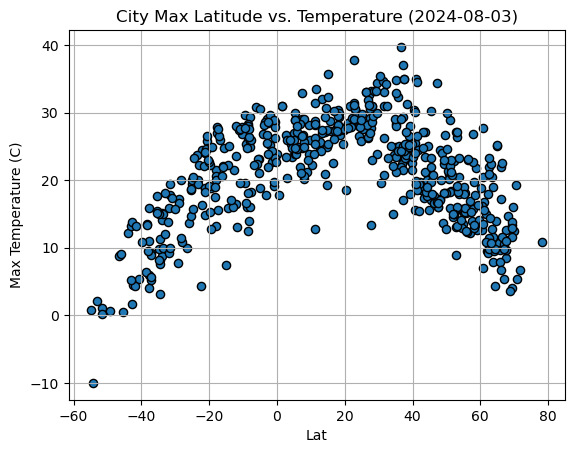

In [29]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot(kind="scatter", x="Lat", y="Max Temp",s=35, edgecolor='k', grid=True)



# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (2024-08-03)")
plt.ylabel("Max Temperature (C)")

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()


#### Latitude Vs. Humidity

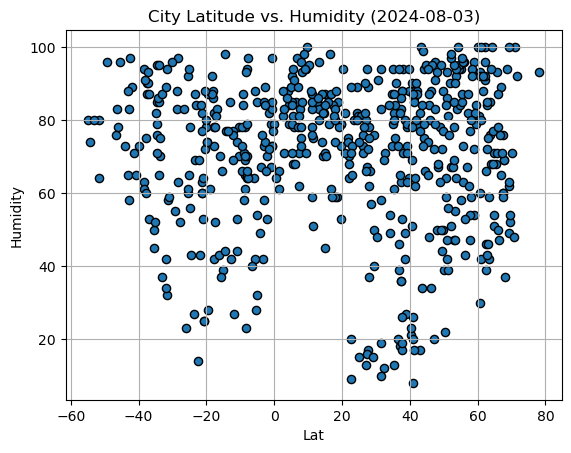

In [30]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot(kind="scatter", x="Lat", y="Humidity",s=35, edgecolor='k', grid=True)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2024-08-03)")
plt.ylabel("Humidity")

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

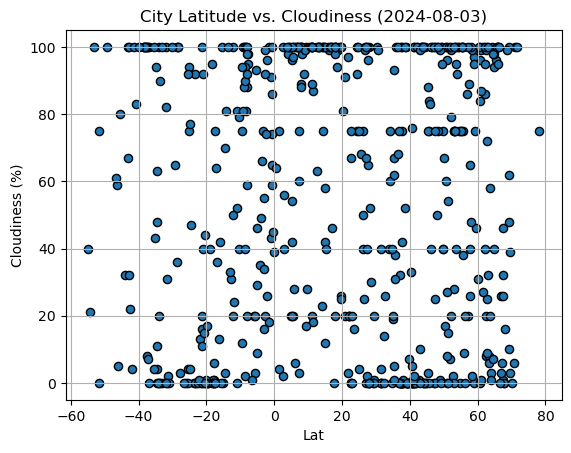

In [31]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot(kind="scatter", x="Lat", y="Cloudiness",s=35, edgecolor='k', grid=True)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2024-08-03)")
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

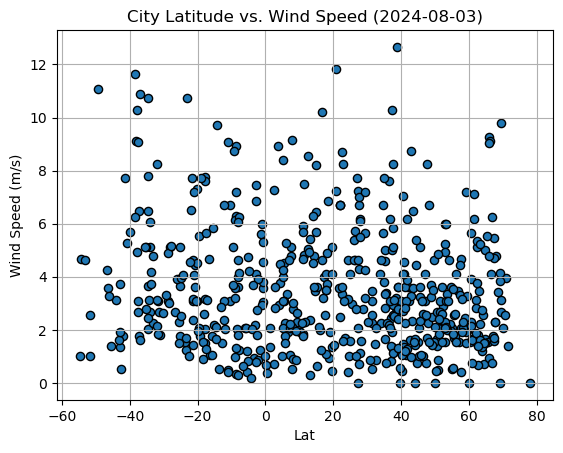

In [32]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot(kind="scatter", x="Lat", y="Wind Speed",s=35, edgecolor='k', grid=True)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2024-08-03)")
plt.ylabel("Wind Speed (m/s)")

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [165]:
# Define a function to create Linear Regression plots
def linear_regression(x_values, y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_value = slope * x_values + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    plt.plot(x_values, regress_value, "-r")
    plt.scatter(x_values, y_values)
   
    # Get current axis limits for line equation plotting
    x_min, x_max = plt.xlim()
    y_min, y_max = plt.ylim()
    
    # Define position for annotation within the plot range
    x_pos = x_min + 0.05 * (x_max - x_min)  # 5% from the left
    y_pos = y_max - 0.1 * (y_max - y_min)   # 10% from the top
    
    # Add line equation
    plt.annotate(line_eq, (x_pos, y_pos), fontsize=15, color="red")
    
   
    print("The r^2-value is: " + str(rvalue))

In [147]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[(city_data_df["Lat"] >= 0)]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,albany,42.6001,-73.9662,18.58,78,1,1.60,US,1723084218
1,notodden,59.5594,9.2585,12.78,84,99,1.94,NO,1723084219
2,yellowknife,62.4560,-114.3525,21.90,46,20,5.14,CA,1723084220
3,kapuskasing,49.4169,-82.4331,18.05,72,100,1.54,CA,1723083761
8,wailua homesteads,22.0669,-159.3780,28.44,70,20,6.69,US,1723084227


In [73]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
4,kibiti,-7.7218,38.9375,18.32,97,95,1.25,TZ,1723084222
5,ushuaia,-54.8000,-68.3000,0.81,80,40,1.03,AR,1723084142
6,tsiombe,-25.3000,45.4833,18.59,92,4,3.64,MG,1723084224
7,port-aux-francais,-49.3500,70.2167,0.59,96,100,11.08,TF,1723084225
10,nova vicosa,-17.8919,-39.3719,21.45,73,1,3.15,BR,1723084229


###  Temperature vs. Latitude Linear Regression Plot

The r^2-value is: -0.669093876641329


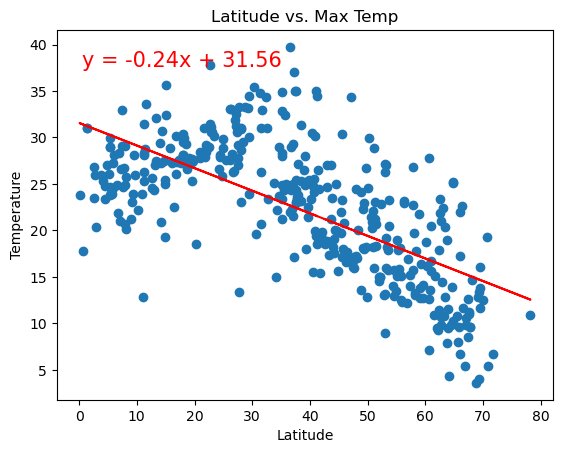

In [166]:
# Linear regression on Northern Hemisphere

linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'])

plt.title("Latitude vs. Max Temp")
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.show()

The r^2-value is: 0.806536932207395


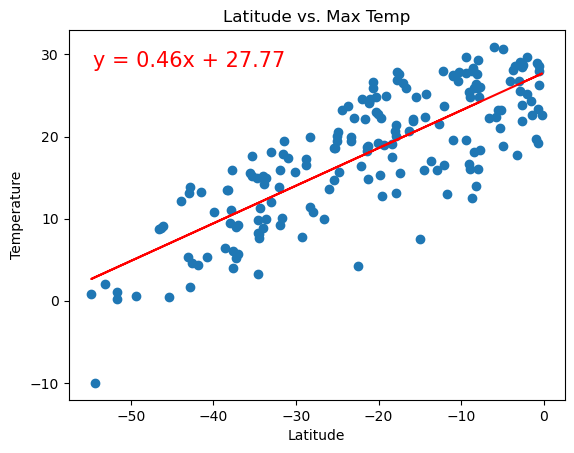

In [167]:
# Linear regression on Southern Hemisphere
linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'])

plt.title("Latitude vs. Max Temp")
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.show()


**Discussion about the linear relationship:** There is a strong correlation in both hemispheres between max temperature and latitude. The closer to a latitude of 0 the higher the max temperature. 

### Humidity vs. Latitude Linear Regression Plot

The r^2-value is: -0.0798035555667933


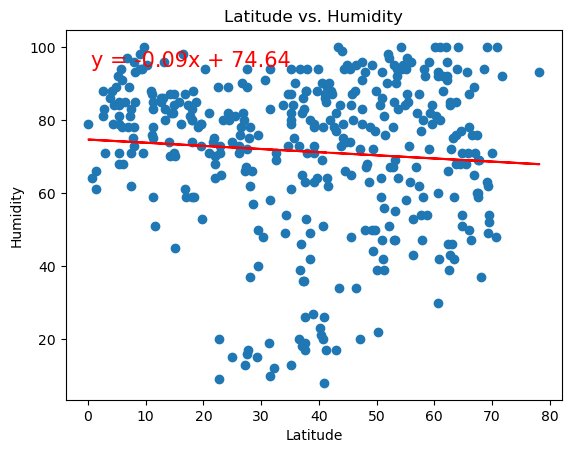

In [168]:
# Northern Hemisphere
linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Humidity'])

plt.title("Latitude vs. Humidity")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

The r^2-value is: -0.1417684974795829


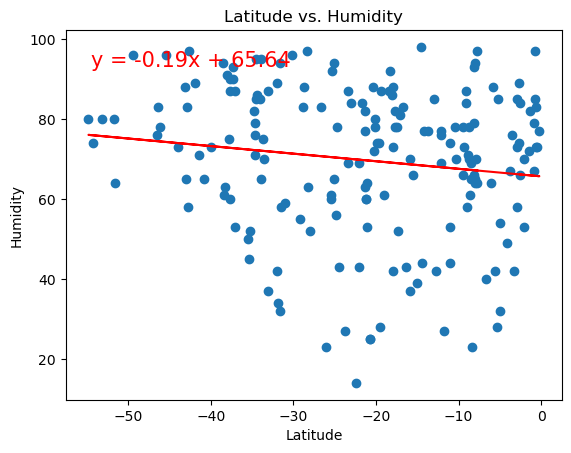

In [172]:
# Southern Hemisphere
linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Humidity'])

plt.title("Latitude vs. Humidity")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

**Discussion about the linear relationship:** There appears to be no correlation between latitude and humidity. The r value is very close to 0 in both the northern and southern hemispheres. 

### Cloudiness vs. Latitude Linear Regression Plot

The r^2-value is: -0.11352061418633502


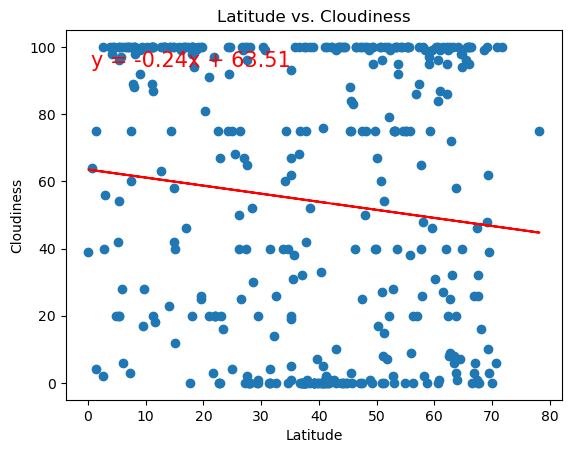

In [169]:
# Northern Hemisphere
linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'])

plt.title("Latitude vs. Cloudiness")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

The r^2-value is: 0.023560000420350263


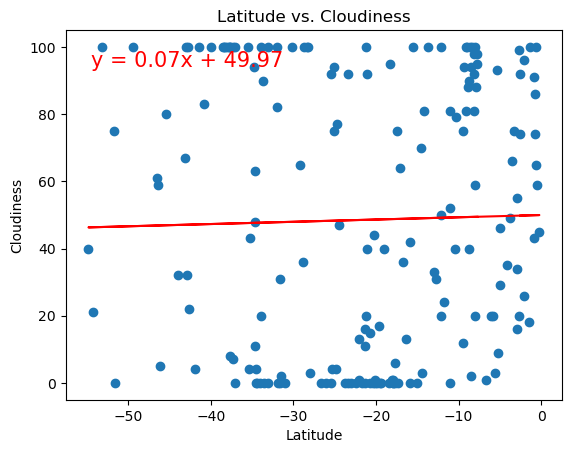

In [170]:
# Southern Hemisphere
linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'])

plt.title("Latitude vs. Cloudiness")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

**Discussion about the linear relationship:** There is no correlation between latitude and cloudiness in the northern hemishpere with a r value near 0. There is a weak negative correlation in the southern hemisphere at a r value also near 0.

### Wind Speed vs. Latitude Linear Regression Plot

The r^2-value is: -0.12979178871788327


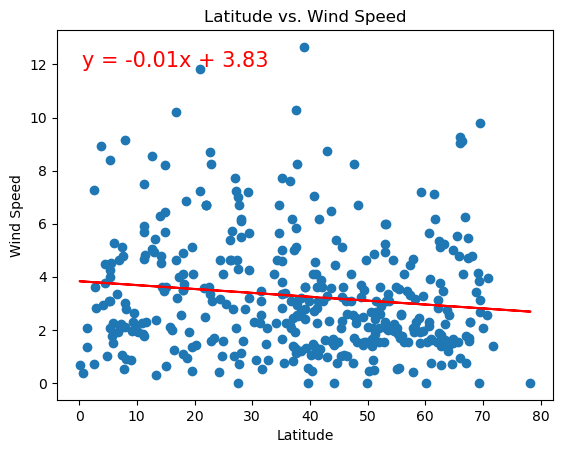

In [171]:
# Northern Hemisphere
linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'])

plt.title("Latitude vs. Wind Speed")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()

The r^2-value is: -0.1489919302908318


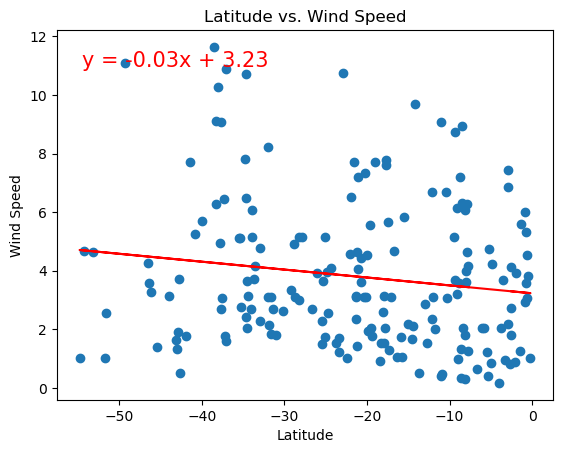

In [173]:
# Southern Hemisphere
linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'])

plt.title("Latitude vs. Wind Speed")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()

**Discussion about the linear relationship:** There appears to be no correlation between wind speed and latitude in both hemispheres with an r value near 0.